<a href="https://colab.research.google.com/github/Johnny-DF26/Machine_Learning/blob/master/Otimiza%C3%A7%C3%A3o_de_modelos_atrav%C3%A9s_de_hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importação das Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, cross_val_score
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

##**Visualização dos Dados**

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop('Unnamed: 0', axis=1)
dados = dados[['km_por_ano', 'preco', 'idade_do_modelo', 'vendido']]

dados.head()

,km_por_ano,preco,idade_do_modelo,vendido
0,35085.22134,30941.02,18,1
1,12622.05362,40557.96,20,1
2,11440.79806,89627.50,12,0
3,43167.32682,95276.14,3,0
4,12770.11290,117384.68,4,1


In [ ]:
# situação horrivel de 'azar' onde as classes estao ordenadas por padrão

dados_azar = dados.sort_values('vendido', ascending=True)

X = dados.drop('vendido', axis=1)
y = dados.vendido
x_azar = dados_azar.drop('vendido',axis=1)
y_azar = dados_azar.vendido

In [ ]:
dados_azar

,km_por_ano,preco,idade_do_modelo,vendido
4999,24812.80412,74023.29,12,0
5322,23095.63834,84843.49,13,0
5319,36240.72746,83100.27,19,0
5316,32249.56426,87932.13,16,0
5315,28414.50704,77937.01,15,0
...,...,...,...,...
5491,25778.40812,71910.43,9,1
1873,15468.97608,30456.53,6,1
1874,16909.33538,69342.41,11,1
5499,19622.68262,70520.39,16,1


In [ ]:
y_azar

4999    0
5322    0
5319    0
5316    0
5315    0
       ..
5491    1
1873    1
1874    1
5499    1
0       1
Name: vendido, Length: 10000, dtype: int64

In [ ]:
SEED = 301
np.random.seed(SEED)

classificador_dummy = DummyClassifier()
resultado = cross_validate(classificador_dummy, x_azar, y_azar, cv=10)
media = resultado['test_score'].mean()
desvio_padrao = resultado['test_score'].std()
print(f'Accuracy com dummy stratified, 10 = {((media - 2*desvio_padrao)*100):.2f}%,  {((media + 2*desvio_padrao)*100):.2f}%')

Accuracy com dummy stratified, 10 = 58.00%,  58.00%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
tree = DecisionTreeClassifier(max_depth=2)
resutlado_tree = cross_validate(tree, x_azar, y_azar, cv=10)
media_tree = resutlado_tree['test_score'].mean()
desvio_padrao_tree = resutlado_tree['test_score'].std()
print(f'Accuracy com dummy stratified, 10 = {((media_tree - 2*desvio_padrao_tree)*100):.2f}%,  {((media_tree + 2*desvio_padrao_tree)*100):.2f}%')

Accuracy com dummy stratified, 10 = 73.83%,  77.73%


In [ ]:
# gerando dados aleatórios de modelo de carro para simulação de agrupamento ao usar nosso 

np.random.seed(SEED)

dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2,3,size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,km_por_ano,preco,idade_do_modelo,vendido,modelo
0,35085.22134,30941.02,18,1,18
1,12622.05362,40557.96,20,1,24
2,11440.79806,89627.50,12,0,14
3,43167.32682,95276.14,3,0,6
4,12770.11290,117384.68,4,1,5


In [ ]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f'Accuracy média é: {(media*100):.2f}')
    print(f'Accuracy = [{((media - 2*desvio_padrao)*100):.2f}%,  {((media + 2*desvio_padrao)*100):.2f}%]')

In [ ]:
# GroupKfold

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

kfold = GroupKFold(n_splits=10)
modelo_arvore = DecisionTreeClassifier(max_depth=10)
resultado = cross_validate(modelo_arvore, x_azar, y_azar, cv=kfold, groups=dados.modelo)
imprime_resultados(resultado)

Accuracy média é: 77.19
Accuracy = [75.32%,  79.06%]


In [ ]:
# GroupKfold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
svc = SVC()

pipeline = Pipeline([('scaler', scaler), ('svc', svc)])

cv = GroupKFold(n_splits=10)
result = cross_validate(pipeline, x_azar, y_azar, cv=kfold, groups=dados.modelo)
imprime_resultados(result)

In [ ]:
modelo_arvore

DecisionTreeClassifier(max_depth=10)

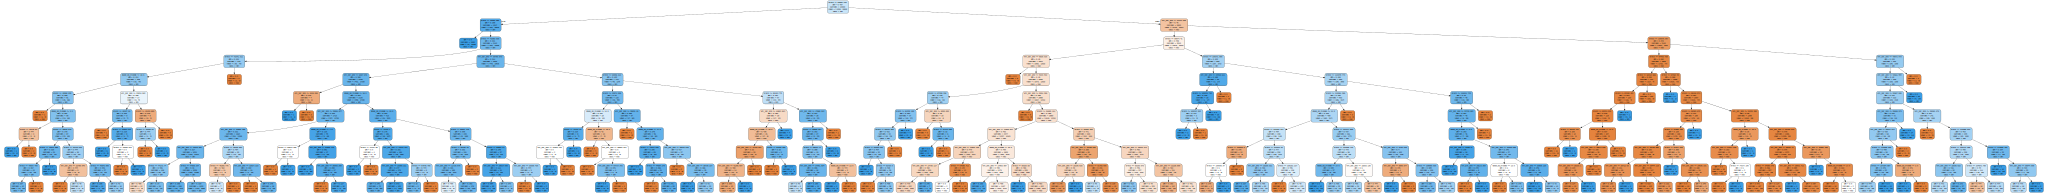

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['nao', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

## **Explorando Hiperparametros 1 dimensão** 

In [ ]:
def roda_arvore_de_decisao(max_depth):

    SEED = 301
    np.random.seed(SEED)

    kfold = GroupKFold(n_splits=10)
    modelo_arvore = DecisionTreeClassifier(max_depth=max_depth)
    resultado = cross_validate(modelo_arvore, x_azar, y_azar, cv=kfold, groups=dados.modelo, return_train_score=True)
    media_teste = resultado['test_score'].mean()*100
    media_treino = resultado['train_score'].mean()*100
    tabela = [max_depth, media_treino, media_teste]
    # print(f'Accuracy média de treino: {(media_treino*100):.2f}, teste: {(media_teste*100):.2f}')
    return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=['Max_depth', 'train', 'test'])
resultados.head()

,Max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.622712
4,5,78.941007,78.535871


#**Overfit**

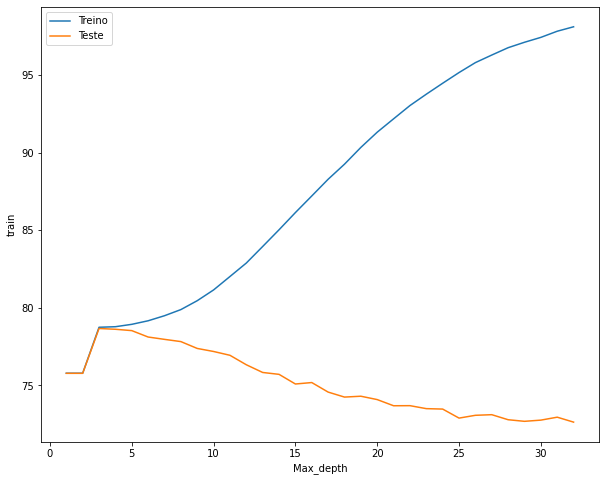

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=resultados, x='Max_depth', y='train', markers=True)
sns.lineplot(data=resultados, x='Max_depth', y='test');
plt.legend(['Treino','Teste']);

In [ ]:
resultados.sort_values('test', ascending=False).head()

,Max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.622712
4,5,78.941007,78.535871
5,6,79.170115,78.123266
6,7,79.495694,77.972548


## **Explorando Hiperparametros 2 dimensões** 

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):

    SEED = 301
    np.random.seed(SEED)

    kfold = GroupKFold(n_splits=10)
    modelo_arvore = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    resultado = cross_validate(modelo_arvore, x_azar, y_azar, cv=kfold, groups=dados.modelo, return_train_score=True)
    media_teste = resultado['test_score'].mean()
    media_treino = resultado['train_score'].mean()
    tabela = [max_depth,min_samples_leaf, media_treino*100, media_teste*100]
    print(f'Arvore Max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}, ACcuracy treino: {(media_treino*100):.2f}, teste: {(media_teste*100):.2f}')
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [31,64,128, 256]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)

    resultados = pd.DataFrame(resultados, columns=['Max_depth', 'Min_samples_leaf', 'train', 'test'])
    return resultados
    
resultados = busca()
resultados.head()

Arvore Max_depth: 1, min_samples_leaf: 31, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 1, min_samples_leaf: 64, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 1, min_samples_leaf: 128, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 1, min_samples_leaf: 256, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 2, min_samples_leaf: 31, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 2, min_samples_leaf: 64, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 2, min_samples_leaf: 128, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 2, min_samples_leaf: 256, ACcuracy treino: 75.79, teste: 75.78
Arvore Max_depth: 3, min_samples_leaf: 31, ACcuracy treino: 78.75, teste: 78.67
Arvore Max_depth: 3, min_samples_leaf: 64, ACcuracy treino: 78.75, teste: 78.67
Arvore Max_depth: 3, min_samples_leaf: 128, ACcuracy treino: 78.75, teste: 78.67
Arvore Max_depth: 3, min_samples_leaf: 256, ACcuracy treino: 78.75, teste: 78.67
Arvore Max_depth: 4, min_samples_l

,Max_depth,Min_samples_leaf,train,test
0,1,31,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,31,75.791169,75.784219


In [ ]:
resultados.sort_values('test', ascending=False).head()


,Max_depth,Min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,31,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,31,78.750993,78.672633


In [ ]:
resultados.corr()

,Max_depth,Min_samples_leaf,train,test
Max_depth,1.000000e+00,1.386232e-16,0.541271,-0.005228
Min_samples_leaf,1.386232e-16,1.000000e+00,-0.410441,0.306006
train,5.412709e-01,-4.104409e-01,1.000000,0.199837
test,-5.227519e-03,3.060059e-01,0.199837,1.000000


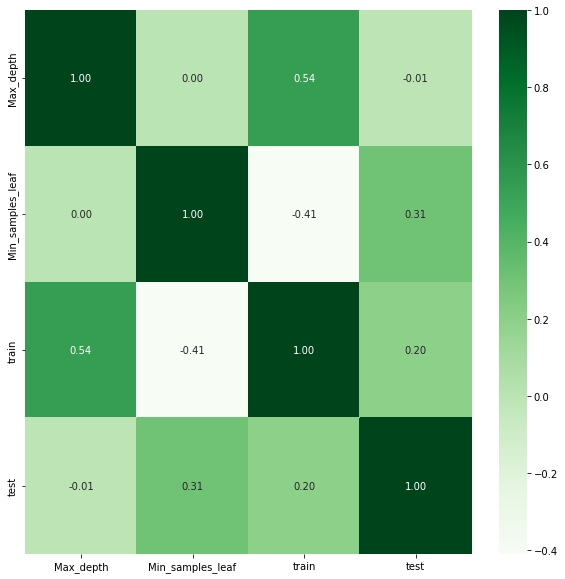

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(resultados.corr(), annot=True, fmt='.2f', cmap='Greens');

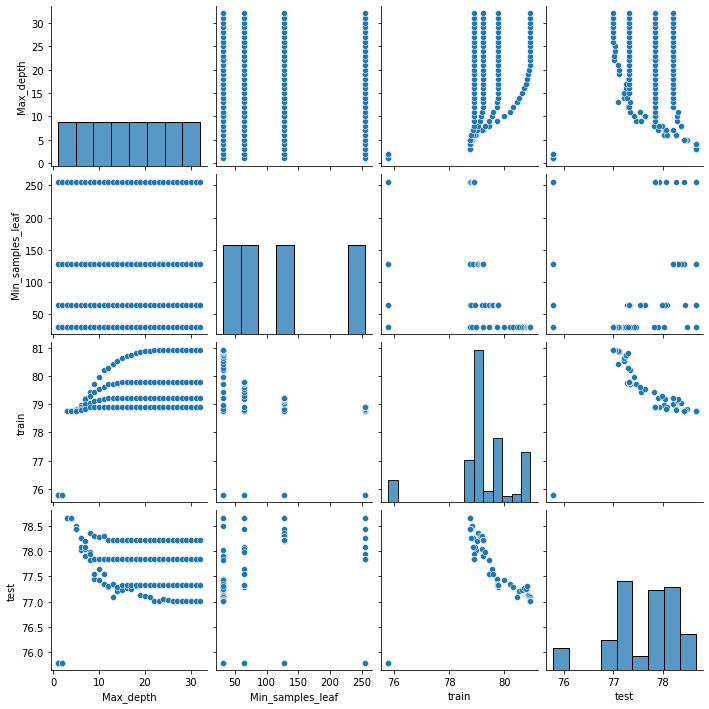

In [ ]:
sns.pairplot(resultados)

##**Explorando os hiperparametros 3 dimensões**

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):

    SEED = 301
    np.random.seed(SEED)

    kfold = GroupKFold(n_splits=10)
    modelo_arvore = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    resultado = cross_validate(modelo_arvore, x_azar, y_azar, cv=kfold, groups=dados.modelo, return_train_score=True)
    fit_time = resultado['fit_time'].mean()
    score_time = resultado['score_time'].mean()
    media_teste = resultado['test_score'].mean()
    media_treino = resultado['train_score'].mean()
    # print(f'Arvore Max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf},min_samples_split: {min_samples_split}, Accuracy treino: {(media_treino*100):.2f}, teste: {(media_teste*100):.2f}')
    tabela = [max_depth,min_samples_leaf,min_samples_split, media_treino*100, media_teste*100, fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            for min_samples_split in [32, 64, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)

    resultados = pd.DataFrame(resultados, columns=['Max_depth', 'Min_samples_leaf', 'Min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
    return resultados
    
resultados = busca()
resultados.head()

,Max_depth,Min_samples_leaf,Min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006375,0.001731
1,1,32,64,75.791169,75.784219,0.005706,0.001695
2,1,32,128,75.791169,75.784219,0.005898,0.001811
3,1,32,256,75.791169,75.784219,0.005772,0.001709
4,1,64,32,75.791169,75.784219,0.005687,0.001750


In [ ]:
corr = resultados.corr()

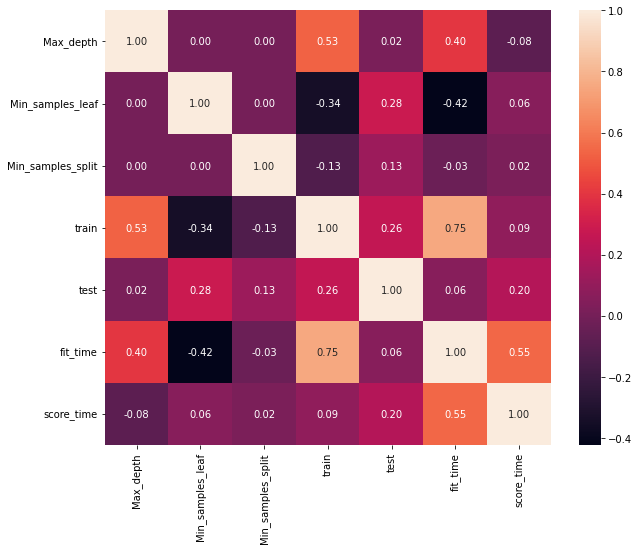

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f')

In [ ]:
resultados.sort_values('test', ascending=False).head()

,Max_depth,Min_samples_leaf,Min_samples_split,train,test,fit_time,score_time
62,4,256,128,78.750993,78.672633,0.012508,0.002086
44,3,256,32,78.750993,78.672633,0.010336,0.001859
32,3,32,32,78.750993,78.672633,0.010801,0.002103
33,3,32,64,78.750993,78.672633,0.011232,0.002078
34,3,32,128,78.750993,78.672633,0.010599,0.001865


In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

parametros = {'max_depth': [3,5], 'min_samples_split': [31,64,128] , 'min_samples_leaf': [32,64,128], 'criterion': ['gini','entropy']}

grid = GridSearchCV(DecisionTreeClassifier(), parametros, cv=GroupKFold(n_splits=10))
grid.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(grid.cv_results_)
melhores_param = grid.best_params_
melhor_score = grid.best_score_
melhor_estimador = grid.best_estimator_

In [ ]:
melhor_estimador

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=31)

In [ ]:
melhor_score

0.7867263337284333

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

arvore = DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=31)
scores = cross_val_score(arvore, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))


In [ ]:
scores

array([0.7795, 0.7785, 0.806 , 0.7905, 0.78  ])

In [ ]:
def imprime_score(score):
    media = score.mean()
    desvio_padrao = score.std()
    print(f'Accuracy média é: {(media*100):.2f}')
    print(f'Accuracy = [{((media - 2*desvio_padrao)*100):.2f}%,  {((media + 2*desvio_padrao)*100):.2f}%]')

In [ ]:
imprime_score(scores)

Accuracy média é: 78.69
Accuracy = [76.59%,  80.79%]


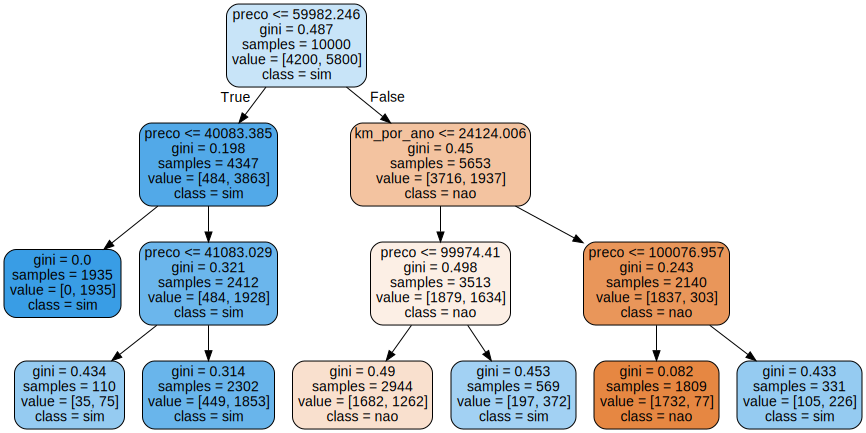

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor_estimador, filled=True, rounded=True, class_names=['nao', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

parametros = {'n_estimators':[40,60], 'criterion':['gini', 'entropy'],
              'min_samples_leaf':[2,5,10], 'min_samples_split':[2,5,10]}
kfold = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(RandomForestClassifier(), parametros, cv=kfold)
grid.fit(x_azar, y_azar)
melhor_param = grid.best_params_
melhorestimador = grid.best_estimator_
melhor_score = grid.best_score_


In [ ]:
melhorestimador

RandomForestClassifier(min_samples_leaf=10, min_samples_split=5,
                       n_estimators=40)

In [ ]:
melhor_score

0.7782

In [ ]:
random = melhorestimador
resultados = []
for i in range(2,10):

    kfold = KFold(n_splits=i, shuffle=True)
    cross = cross_val_score(random, x_azar, y_azar, cv=kfold)
    resultados.append(cross.mean())

In [ ]:
resultados = pd.DataFrame(resultados, columns={'Arvores de Decisao': (resultados,'%')})
resultados.round(4)*100

,Arvores de Decisao
0,77.86
1,77.70
2,77.36
3,77.42
4,77.47
5,77.40
6,77.68
7,77.34


# Parte II

## **Busca aleatória : RandomSearch**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED = 301

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)
estimador = DecisionTreeClassifier()
parametros = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': [32,64,128],
              'min_samples_split': [32,64,128], 'max_depth': [3,5],
              'splitter': ['best', 'random']}

grid = RandomizedSearchCV(estimador, parametros, n_iter=16, cv=kfold)
grid.fit(x_azar, y_azar)
melhor_estimador = grid.best_estimator_
melhor_score = grid.best_score_

In [ ]:
melhor_estimador

DecisionTreeClassifier(max_depth=3, min_samples_leaf=128, min_samples_split=64)

In [ ]:
melhor_score

0.787

In [ ]:
from sklearn.model_selection import cross_val_score

cross = cross_val_score(melhor_estimador, x_azar, y_azar, cv=kfold)
cross

array([0.784 , 0.776 , 0.8025, 0.793 , 0.7795])

In [ ]:
imprime_score(cross)

Accuracy média é: 78.70
Accuracy = [76.78%,  80.62%]


# Customizando o espaço de hiper parâmetros

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED = 301

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)
estimador = DecisionTreeClassifier()
parametros = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': randint(32,128),
              'min_samples_split': randint(32,128), 'max_depth': [3,5,10,15,20,30,None],
              'splitter': ['best', 'random']}

grid = RandomizedSearchCV(estimador, parametros, n_iter=16, cv=kfold)
grid.fit(x_azar, y_azar)
melhor_estimador = grid.best_estimator_
melhor_score = grid.best_score_

In [ ]:
scores = cross_val_score(melhor_estimador, x_azar, y_azar, cv=kfold)
imprime_score(scores)
print(melhor_estimador)

Accuracy média é: 78.70
Accuracy = [76.78%,  80.62%]
DecisionTreeClassifier(max_depth=3, min_samples_leaf=75, min_samples_split=53)


In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005651,0.001475,0.001947,0.000317,entropy,15,92,79,random,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.7710,0.752,0.7865,0.760,0.769,0.7677,0.011591,10
1,0.004027,0.000153,0.001683,0.000077,entropy,30,111,95,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.7425,0.734,0.7825,0.781,0.741,0.7562,0.021063,13


In [ ]:
resultado_melhores_score = results.sort_values('mean_test_score', ascending=False)

for index, linha in resultado_melhores_score.iterrows():
    print(f'{linha.mean_test_score:.2f}, +-{linha.std_test_score:.5f}, {linha.params}')

0.79, +-0.00962, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 75, 'min_samples_split': 53, 'splitter': 'best'}
0.78, +-0.01124, {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 117, 'min_samples_split': 82, 'splitter': 'best'}
0.78, +-0.00672, {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 61, 'splitter': 'best'}
0.78, +-0.00728, {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 84, 'min_samples_split': 118, 'splitter': 'best'}
0.78, +-0.00851, {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 117, 'min_samples_split': 110, 'splitter': 'best'}
0.78, +-0.00858, {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 88, 'min_samples_split': 76, 'splitter': 'best'}
0.78, +-0.00435, {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 95, 'min_samples_split': 97, 'splitter': 'best'}
0.78, +-0.00463, {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 115, 'min_samples_split': 35, 'spl

## Exploração mais a fundo de forma aleatória

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED = 564

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)
estimador = DecisionTreeClassifier()
parametros = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': randint(32,128),
              'min_samples_split': randint(32,128), 'max_depth': [3,5,10,15,20,30,None],
              'splitter': ['best', 'random']}

grid = RandomizedSearchCV(estimador, parametros, n_iter=64, cv=kfold)
grid.fit(x_azar, y_azar)
melhor_estimador = grid.best_estimator_
melhor_score = grid.best_score_
results = pd.DataFrame(grid.cv_results_)

In [ ]:
resultado_melhores_score = results.sort_values('mean_test_score', ascending=False)

for index, linha in resultado_melhores_score.iterrows():
    print(f'{linha.mean_test_score:.2f}, +-{linha.std_test_score:.5f}, {linha.params}')

0.79, +-0.00561, {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 93, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 86, 'min_samples_split': 125, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 85, 'min_samples_split': 64, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 63, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 93, 'min_samples_split': 66, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 77, 'min_samples_split': 103, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 127, 'min_samples_split': 48, 'splitter': 'best'}
0.79, +-0.00661, {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 46, 'min_samples_split': 87, 'splitter': '

In [ ]:
scores = cross_val_score(melhor_estimador, x_azar, y_azar, cv=kfold)
imprime_score(scores)
print(melhor_estimador)

Accuracy média é: 78.69
Accuracy = [77.57%,  79.81%]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=37,
                       min_samples_split=93)


# Comparando ReadsearchCV com GridSearchCV

In [ ]:
# GridSearchCV
import time
SEED = 301

parametros = {'n_estimators': [10,100],'max_depth': [3,5], 'criterion':['gini', 'entropy'],
              'min_samples_leaf':[32,64,128], 'min_samples_split':[32,64,128], 'bootstrap': [True, False]}

kfold = KFold(n_splits=5, shuffle=True)

tic = time.time()
grid = GridSearchCV(RandomForestClassifier(), parametros, cv=kfold)
grid.fit(x_azar, y_azar)
tac = time.time()
tempo_percorrido = tac - tic
print(f'Tempo gasto foi de: {tempo_percorrido:.2f} segundos')

melhor_param = grid.best_params_
melhorestimador = grid.best_estimator_
melhor_score = grid.best_score_
resultados = pd.DataFrame(grid.cv_results_)

Tempo gasto foi de: 197.16 segundos


In [ ]:
melhorestimador

RandomForestClassifier(max_depth=5, min_samples_leaf=32, min_samples_split=64,
                       n_estimators=10)

In [ ]:
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037831,0.001800,0.004792,0.000324,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.743,0.7635,0.7735,0.7550,0.7840,0.7638,0.014229,130
1,0.349394,0.010304,0.026978,0.001506,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.784,0.7550,0.7805,0.7665,0.7805,0.7733,0.010948,87


In [ ]:
resultado_melhores_score = results.sort_values('mean_test_score', ascending=False)

for index, linha in resultado_melhores_score[:5].iterrows():
    print(f'{linha.mean_test_score:.2f}, +-{linha.std_test_score:.5f}, {linha.params}')

0.79, +-0.00561, {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 93, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 86, 'min_samples_split': 125, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 85, 'min_samples_split': 64, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 63, 'splitter': 'best'}
0.79, +-0.00561, {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 93, 'min_samples_split': 66, 'splitter': 'best'}


In [ ]:

tic = time.time()
scores = cross_val_score(melhorestimador, x_azar, y_azar, cv=kfold)
tac = time.time()
tempo = tac - tic

print(f'{tempo:.2f} segundos' )
imprime_score(scores)
print(melhorestimador)

0.27 segundos
Accuracy média é: 77.90
Accuracy = [76.67%,  79.13%]
RandomForestClassifier(max_depth=5, min_samples_leaf=32, min_samples_split=64,
                       n_estimators=10)


In [ ]:
# RandomizedSearchCV

import time
SEED = 301

kfold = KFold(n_splits=5, shuffle=True)
parametros = {'n_estimators':  randint(10,101),'max_depth': randint(3,6), 'criterion':['gini', 'entropy'],
              'min_samples_leaf': randint(32,129), 'min_samples_split': randint(32,129), 'bootstrap': [True, False]}
estimador = RandomForestClassifier()

tic = time.time()
grid = RandomizedSearchCV(estimador, parametros, cv=kfold, n_iter=80)
grid.fit(x_azar, y_azar)
tac = time.time()
tempo_percorrido = tac - tic
print(f'Tempo gasto foi de: {tempo_percorrido:.2f} segundos')

melhor_param_random = grid.best_params_
melhorestimador_random = grid.best_estimator_
melhor_score_random = grid.best_score_
resultados_randomidez = pd.DataFrame(grid.cv_results_)

Tempo gasto foi de: 109.40 segundos


In [ ]:
resultado_melhores_score = resultados_randomidez.sort_values('mean_test_score', ascending=False)

for index, linha in resultado_melhores_score[-5:].iterrows():
    print(f'{linha.mean_test_score:.3f}, +-{linha.std_test_score:.5f}, {linha.params}')

0.765, +-0.01344, {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 123, 'min_samples_split': 65, 'n_estimators': 13}
0.765, +-0.01890, {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 73, 'min_samples_split': 106, 'n_estimators': 12}
0.763, +-0.01983, {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 94, 'min_samples_split': 94, 'n_estimators': 50}
0.763, +-0.00957, {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 86, 'min_samples_split': 34, 'n_estimators': 12}
0.763, +-0.01654, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 87, 'min_samples_split': 104, 'n_estimators': 17}


In [ ]:
tic = time.time()
scores = cross_val_score(melhorestimador, x_azar, y_azar, cv=kfold)
tac = time.time()
tempo = tac - tic

print(f'{tempo:.2f} segundos' )
imprime_score(scores)
print(melhorestimador)

0.33 segundos
Accuracy média é: 77.98
Accuracy = [76.53%,  79.43%]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=64,
                       min_samples_split=64, n_estimators=10)


##**Trabalhando sem o cross validation(treino e teste)**

In [ ]:
from sklearn.model_selection import train_test_split
# 0.6 treino  
# 0.2 teste 
# 0.2 validação

X_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar, random_state=301)

In [ ]:
X_treino_teste.shape, x_validacao.shape, y_treino_teste.shape, y_validacao.shape

((8000, 3), (2000, 3), (8000,), (2000,))

In [ ]:
# RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
import time
SEED = 301

parametros = {'n_estimators':  randint(10,101),'max_depth': randint(3,6), 'criterion':['gini', 'entropy'],
              'min_samples_leaf': randint(32,129), 'min_samples_split': randint(32,129), 'bootstrap': [True, False]}
estimador = RandomForestClassifier()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

tic = time.time()
grid = RandomizedSearchCV(estimador, parametros, cv=split, n_iter=5)
grid.fit(X_treino_teste, y_treino_teste)
tac = time.time()
tempo_percorrido = tac - tic
print(f'Tempo gasto foi de: {tempo_percorrido:.2f} segundos')

melhor_param_random = grid.best_params_
melhorestimador_random = grid.best_estimator_
melhor_score_random = grid.best_score_
resultados_randomidez = pd.DataFrame(grid.cv_results_)

Tempo gasto foi de: 3.46 segundos


In [ ]:
melhorestimador_random

RandomForestClassifier(max_depth=5, min_samples_leaf=32, min_samples_split=78,
                       n_estimators=79)

In [ ]:
resultados_randomidez

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.572123,0.0,0.036634,0.0,True,entropy,5,116,73,79,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7725,0.7725,0.0,1
1,0.217139,0.0,0.017292,0.0,False,gini,4,95,86,32,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7670,0.7670,0.0,5
2,0.790208,0.0,0.072538,0.0,False,gini,5,104,126,71,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7695,0.7695,0.0,3
3,0.476793,0.0,0.025025,0.0,True,gini,4,105,72,76,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7700,0.7700,0.0,2
4,0.316807,0.0,0.019638,0.0,False,entropy,4,78,53,66,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7680,0.7680,0.0,4


In [ ]:
tic = time.time()
scores = cross_val_score(melhorestimador, x_validacao, y_validacao, cv=split)
tac = time.time()
tempo = tac - tic

print(f'{tempo:.2f} segundos' )
scores

0.05 segundos


array([0.756])